In [4]:
#По хорошему надо создать виртуальное окружение и импортировать туда все необходимые библиотеки из requiments.txt, но у меня не хватает места на жестком диске
#Поэтому виртуальное окружение создавать не буду. 
#выполнить в терминале
%cd /home/mikhail/it-academy/github/VisionDigital/
!source venv/bin/activate
!pip install -r requiments.txt 

/home/mikhail/it-academy/github/Diplom_project


In [9]:
#                                                                          путь к папке где находятся картинки
! /bin/python3 /home/mikhail/it-academy/github/VisionDigital/trainer/dataset.py  -datapath '/home/mikhail/it-academy/github/VisionDigital/data/val'

                       filename  words
0    61.7_ 24122022 230753.jpeg   61.7
1    .563_ 12122022 112639.jpeg   .563
2    .442_ 12122022 111058.jpeg   .442
3    .100_ 12122022 095317.jpeg   .100
4    .100_ 12122022 095310.jpeg   .100
..                          ...    ...
128  .009_ 12122022 092806.jpeg   .009
129  137.5_ 25122022 00533.jpeg  137.5
130  .004_ 12122022 092726.jpeg   .004
131  .104_ 12122022 095934.jpeg   .104
132   49.7_ 25122022 00437.jpeg   49.7

[133 rows x 2 columns]


In [10]:
#                                                                          путь к папке где находятся картинки
! /bin/python3 /home/mikhail/it-academy/github/VisionDigital/trainer/dataset.py  -datapath '/home/mikhail/it-academy/github/VisionDigital/data/train'

                         filename  words
0      61.7_ 24122022 230753.jpeg   61.7
1      .956_ 12122022 123154.jpeg   .956
2      4.50_ 19122022 233129.jpeg   4.50
3      .815_ 12122022 121208.jpeg   .815
4      .641_ 12122022 114613.jpeg   .641
...                           ...    ...
2668   .637_ 12122022 114532.jpeg   .637
2669  130.4_ 24122022 232516.jpeg  130.4
2670   -5.70_ 20122022 03754.jpeg  -5.70
2671  19.60_ 19122022 223045.jpeg  19.60
2672   .939_ 12122022 122941.jpeg   .939

[2673 rows x 2 columns]


/tmp/ipykernel_14316/1516194513.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


'\nрежим_группировки — один из четырех режимов группировки найденных контуров:\n\n    CV_RETR_LIST — выдаёт все контуры без группировки;\n    CV_RETR_EXTERNAL — выдаёт только крайние внешние контуры. Например, если в кадре будет пончик, то функция вернет его\xa0внешнюю\xa0границу без дырки.\n    CV_RETR_CCOMP —\xa0группирует контуры в двухуровневую иерархию. На верхнем уровне — внешние контуры объекта. На втором уровне — контуры отверстий, если таковые имеются. Все остальные контуры попадают\xa0на верхний уровень.\n    CV_RETR_TREE — группирует контуры в многоуровневую иерархию.\n\nметод_упаковки — один из трёх методов упаковки контуров:\n\n    CV_CHAIN_APPROX_NONE — упаковка отсутствует и все контуры хранятся в виде отрезков, состоящих из двух пикселей.\n    CV_CHAIN_APPROX_SIMPLE —\xa0склеивает все горизонтальные, вертикальные и диагональные контуры.\n    CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS — применяет к контурам метод упаковки (аппроксимации) Teh-Chin.\n'

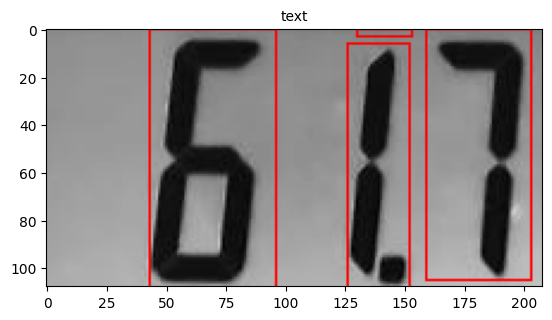

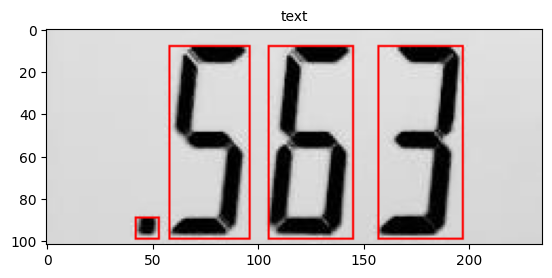

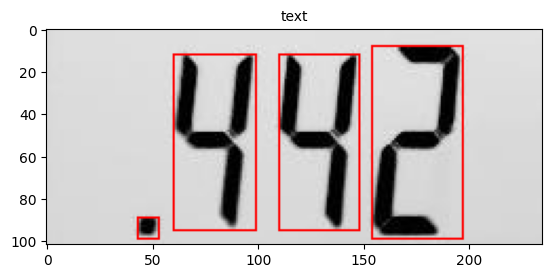

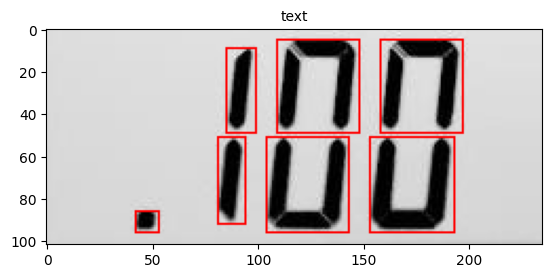

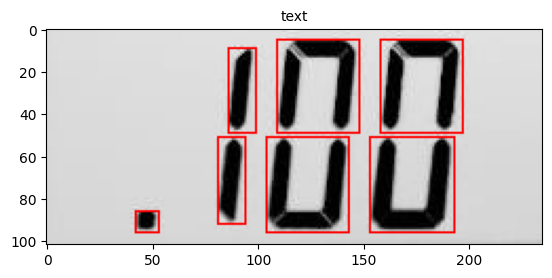

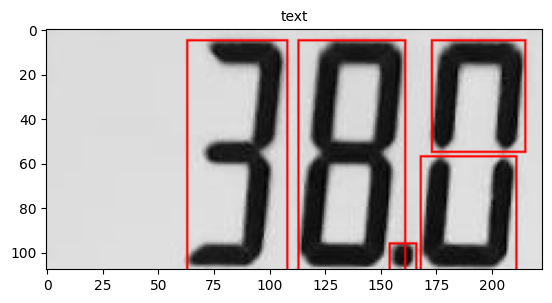

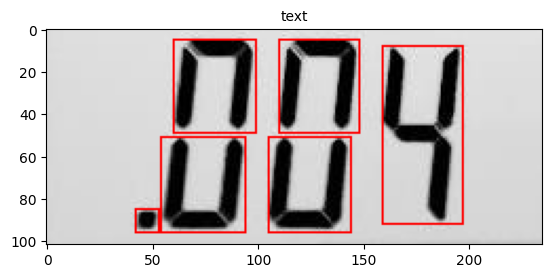

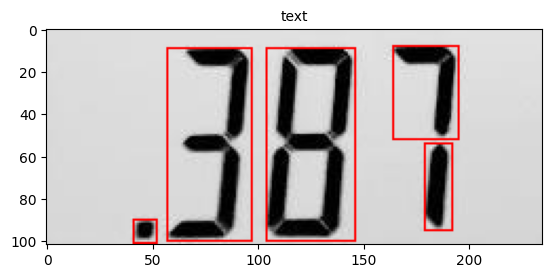

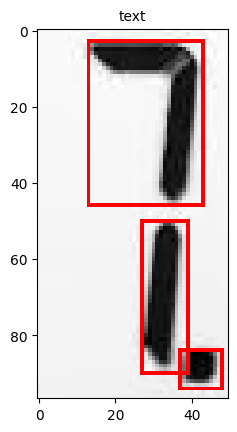

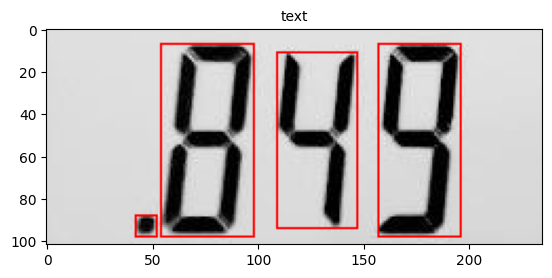

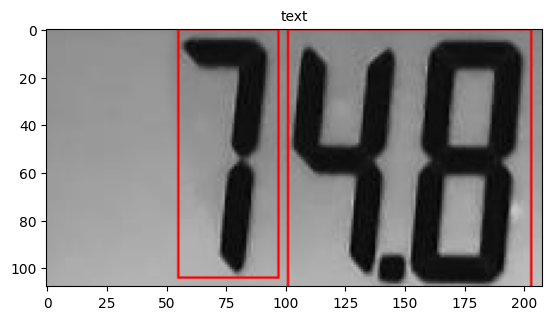

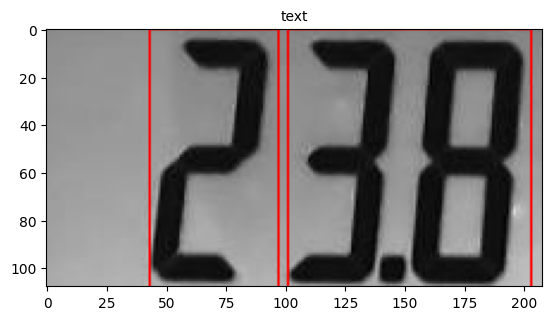

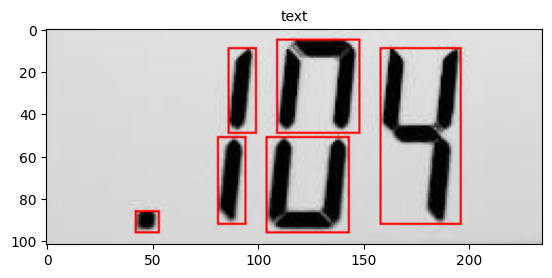

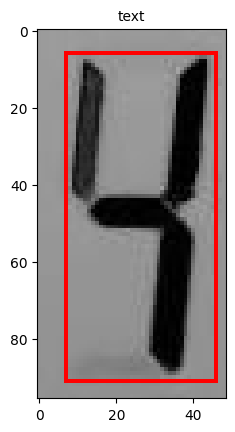

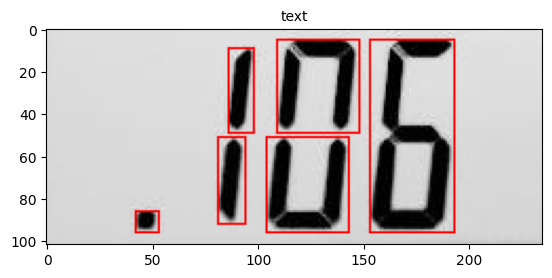

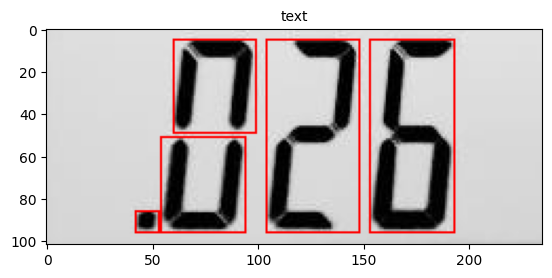

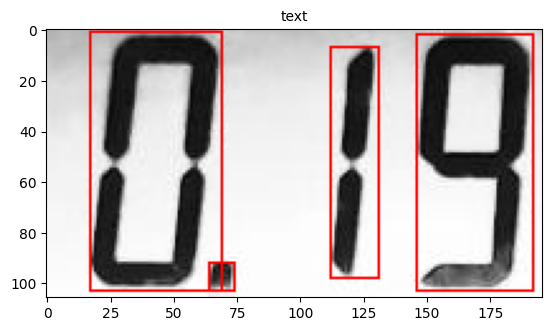

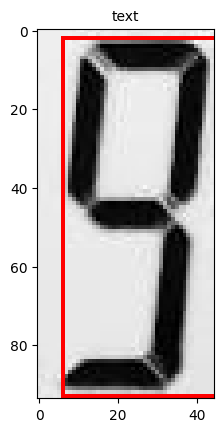

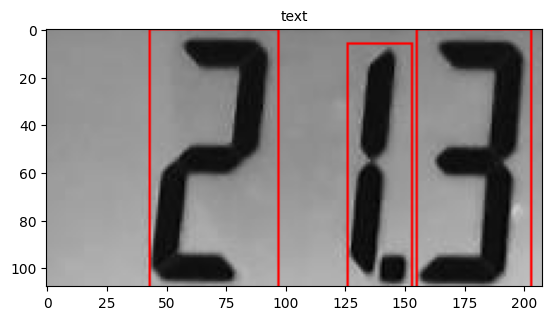

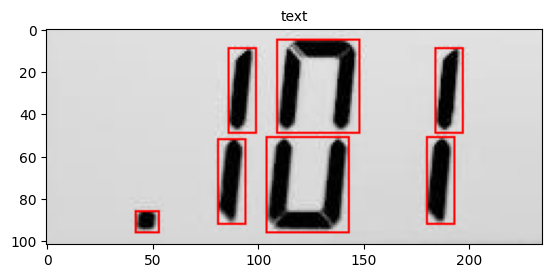

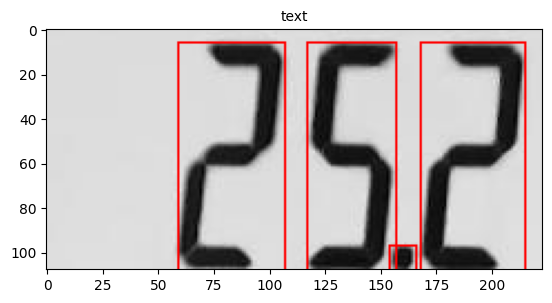

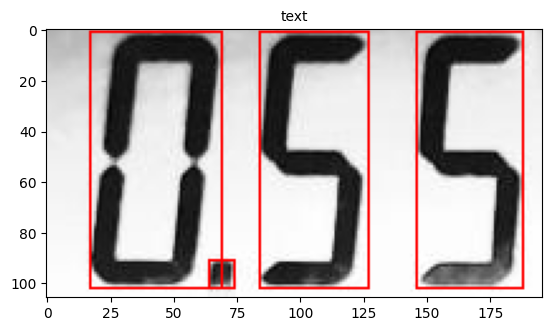

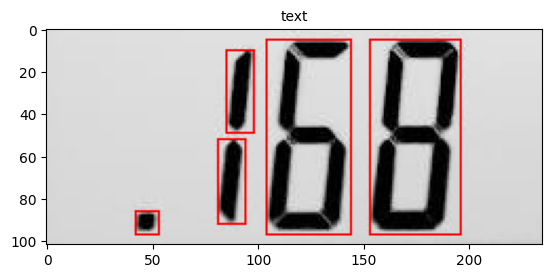

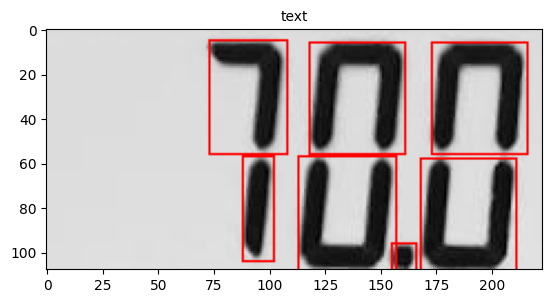

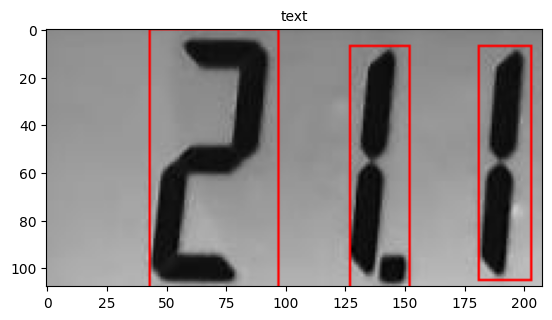

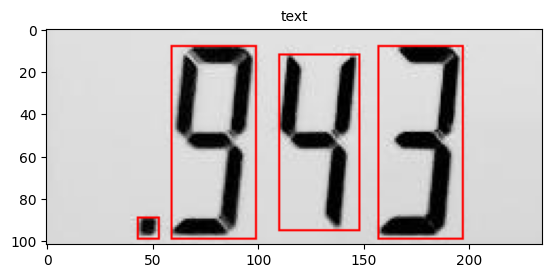

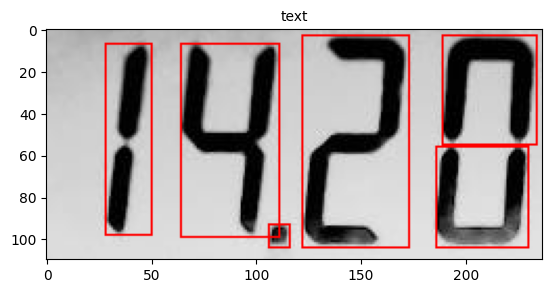

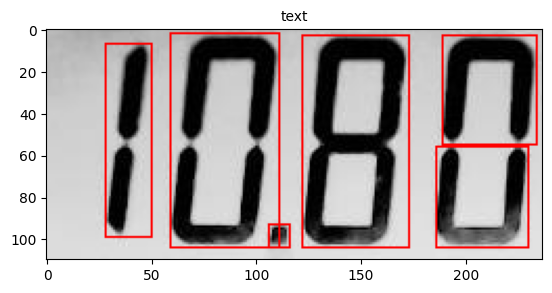

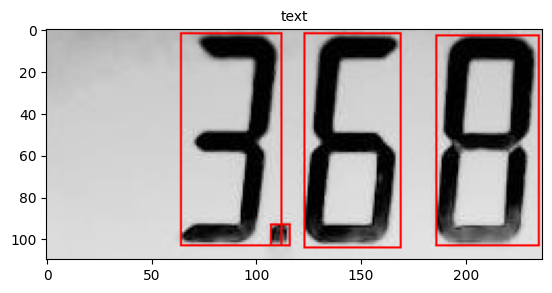

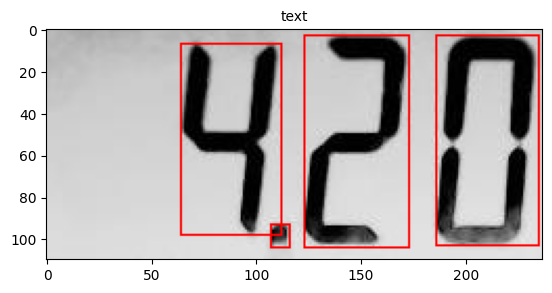

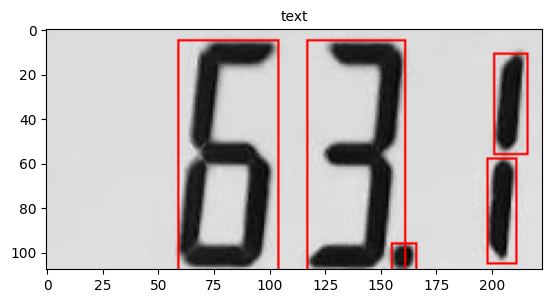

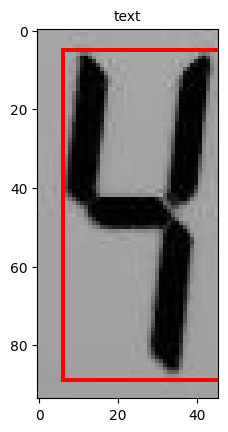

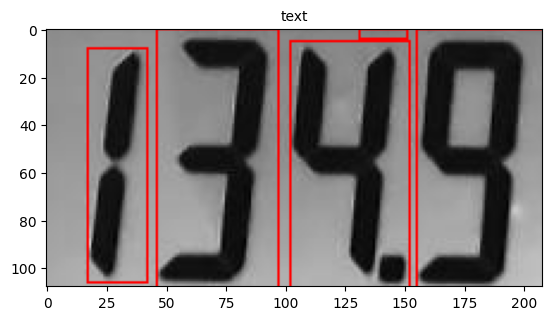

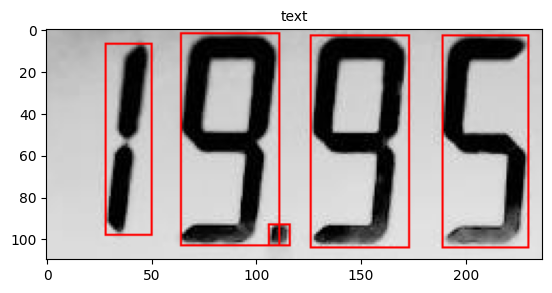

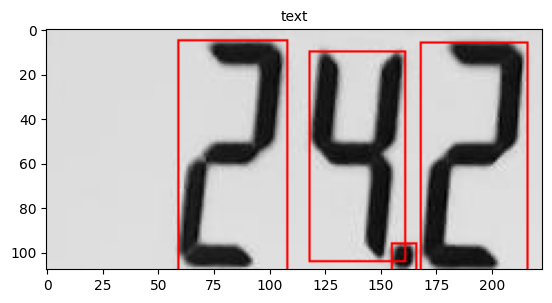

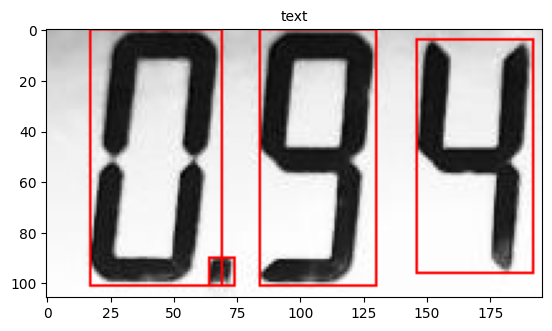

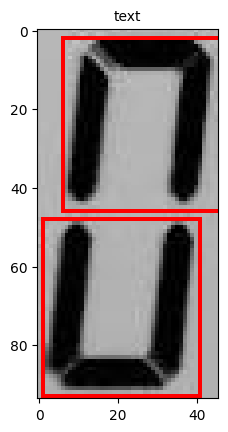

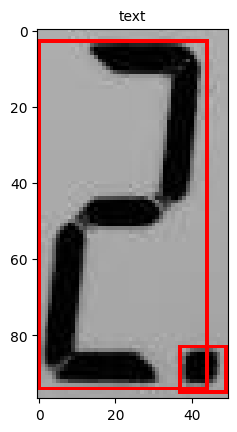

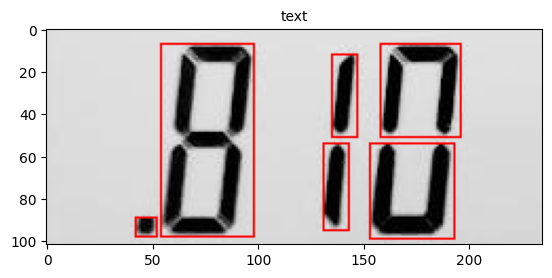

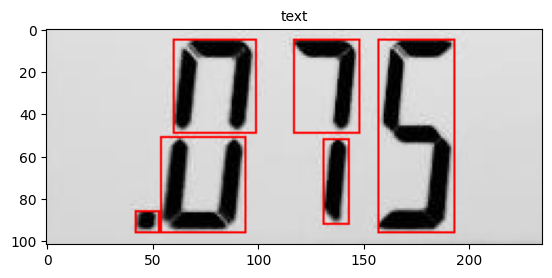

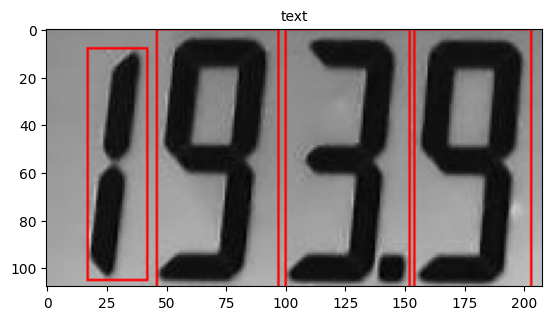

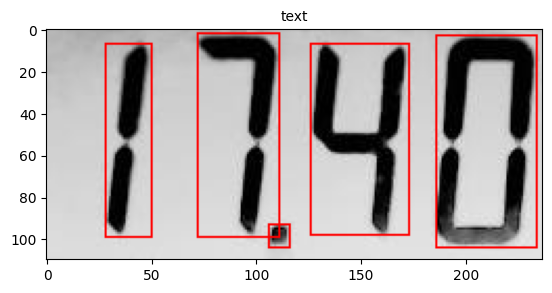

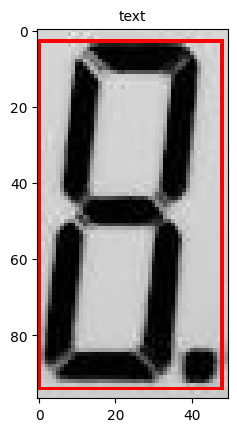

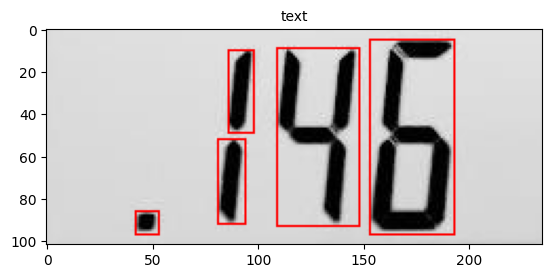

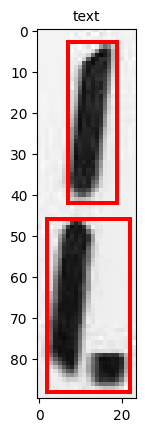

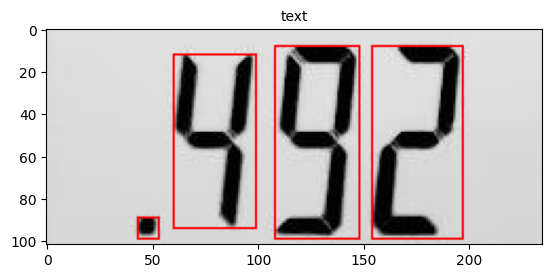

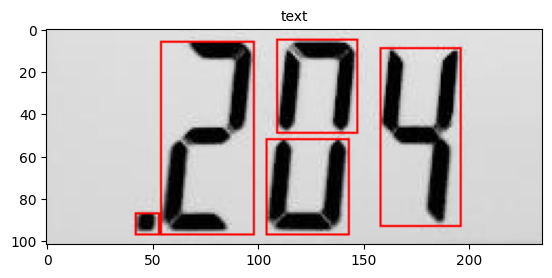

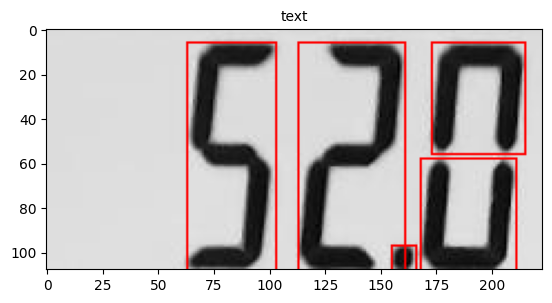

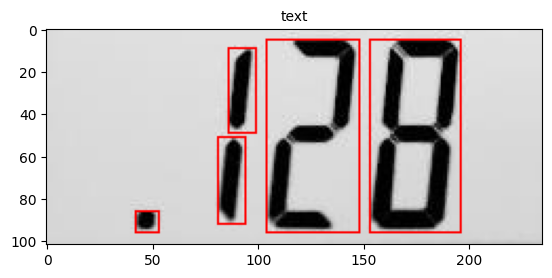

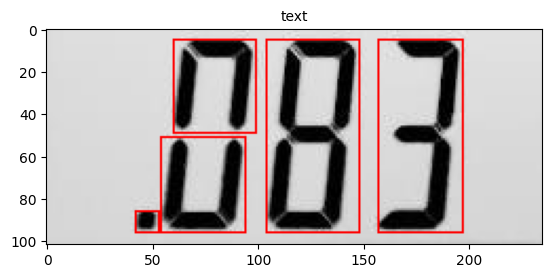

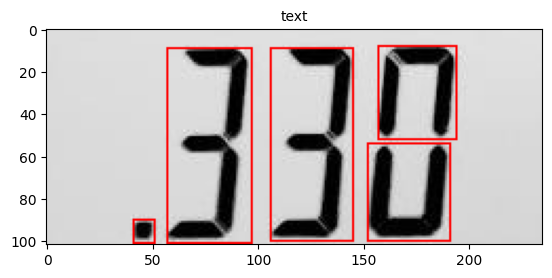

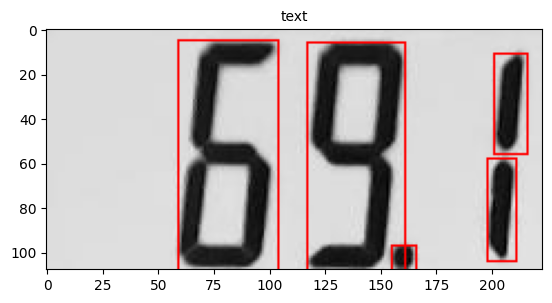

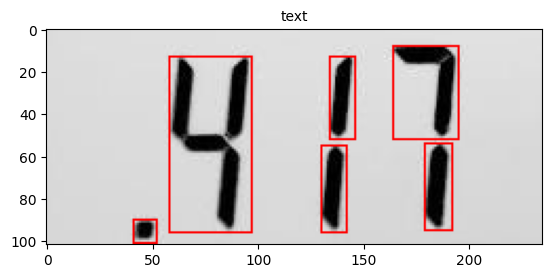

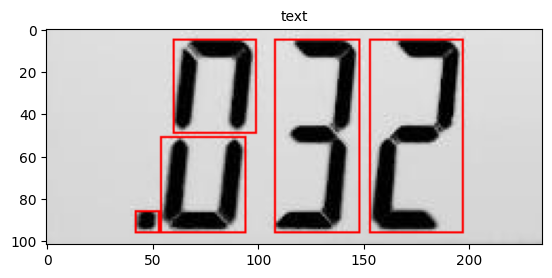

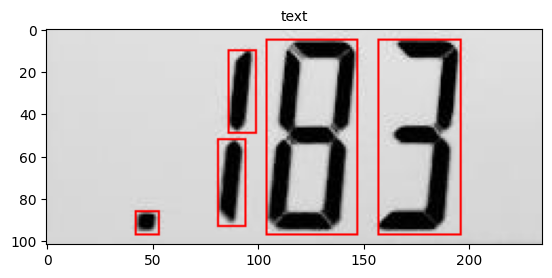

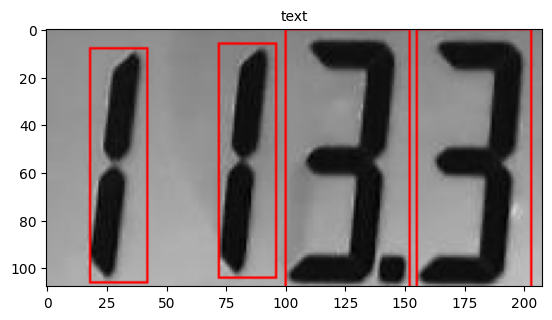

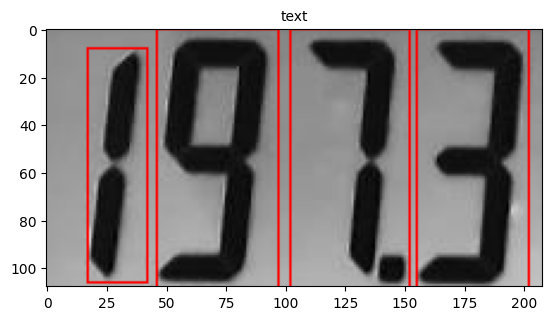

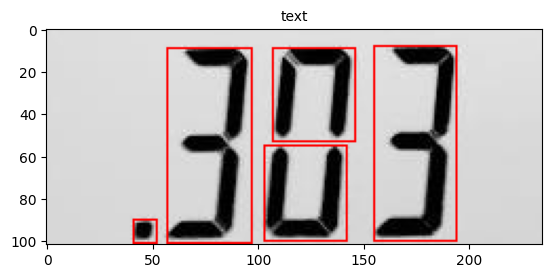

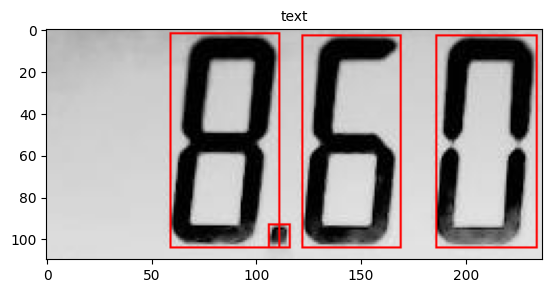

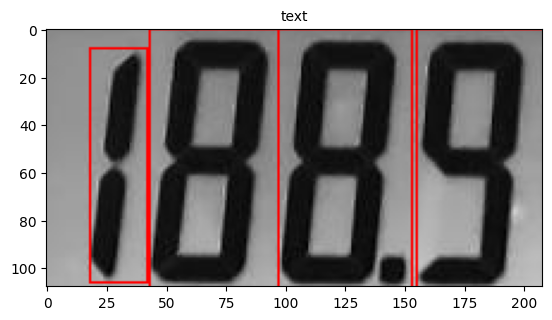

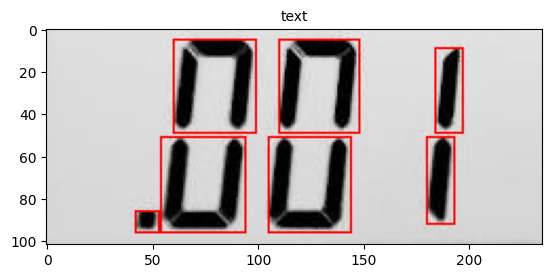

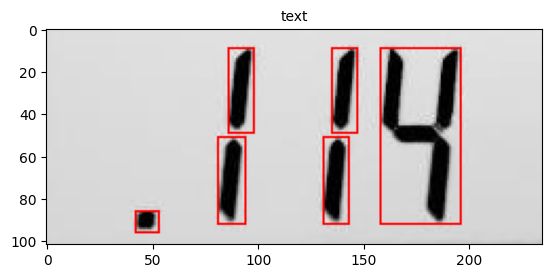

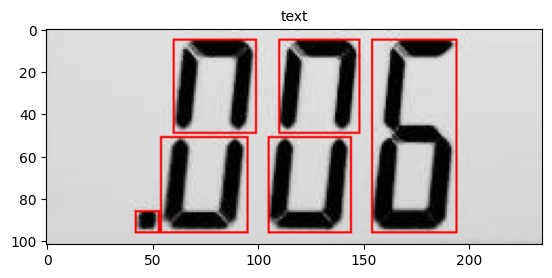

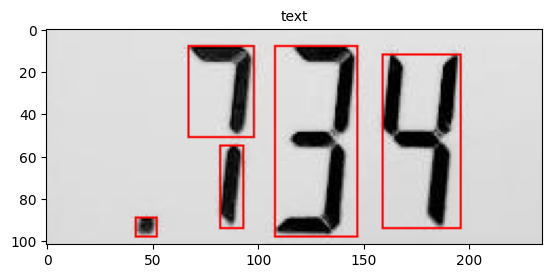

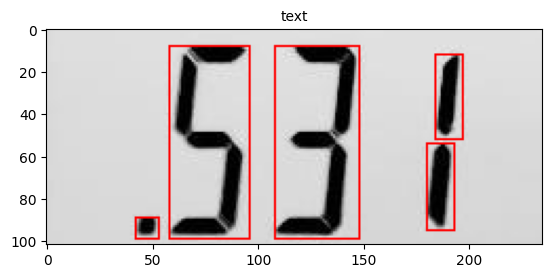

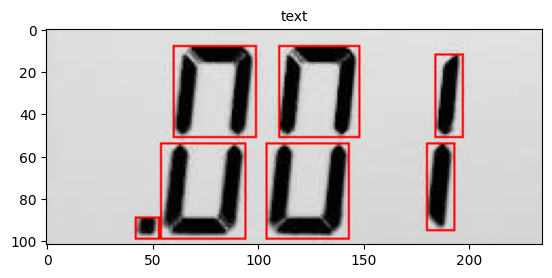

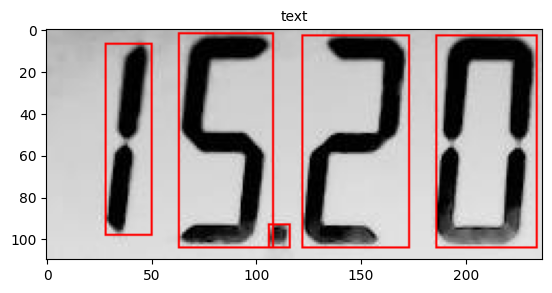

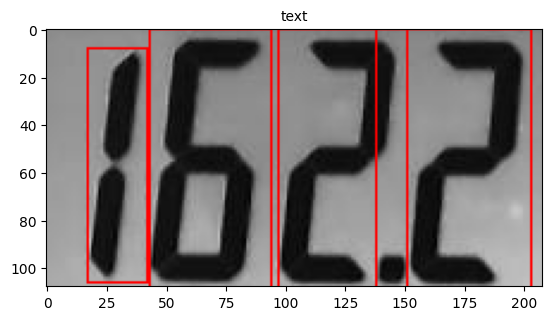

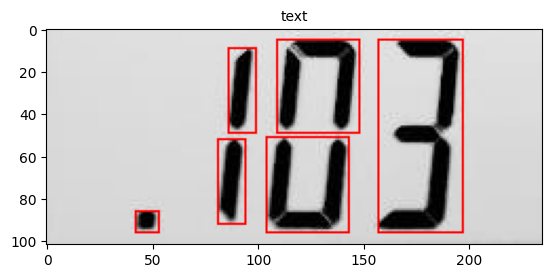

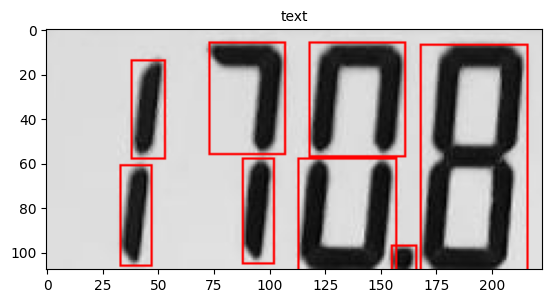

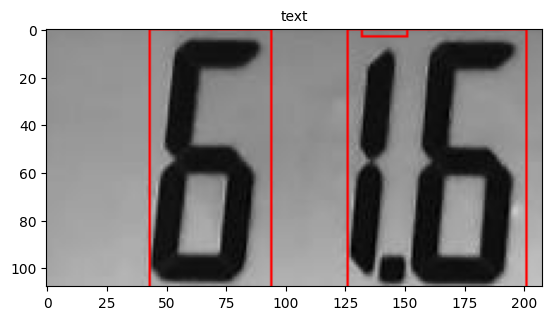

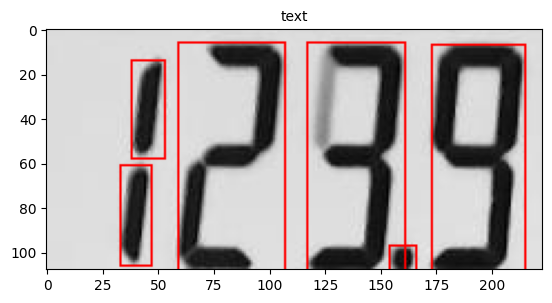

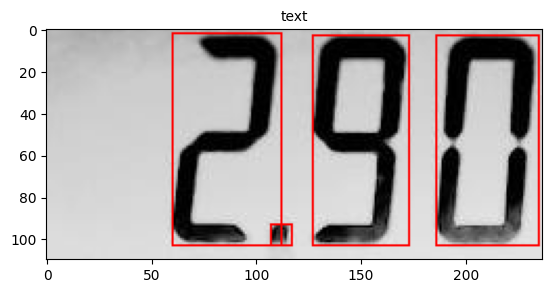

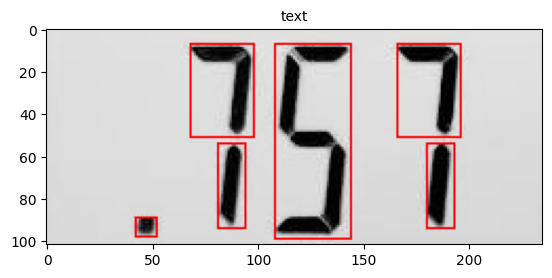

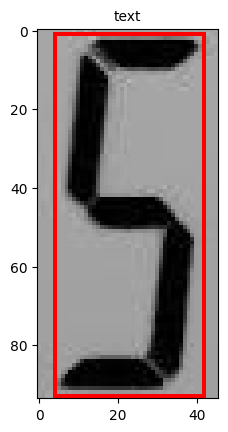

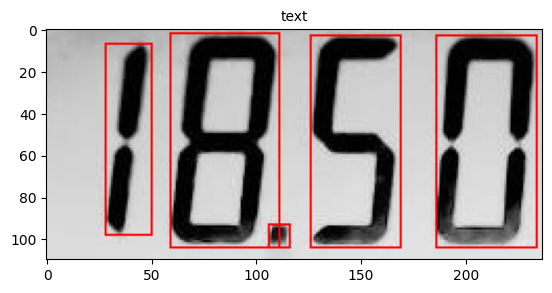

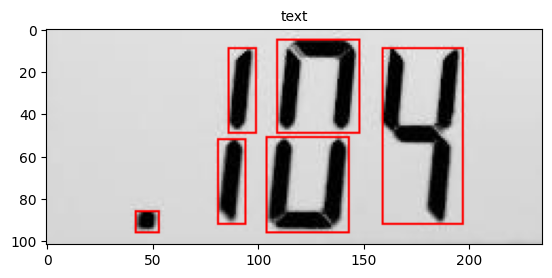

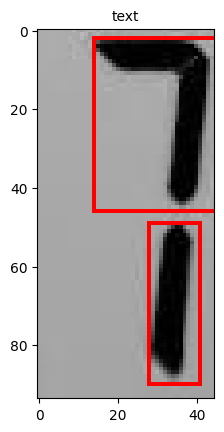

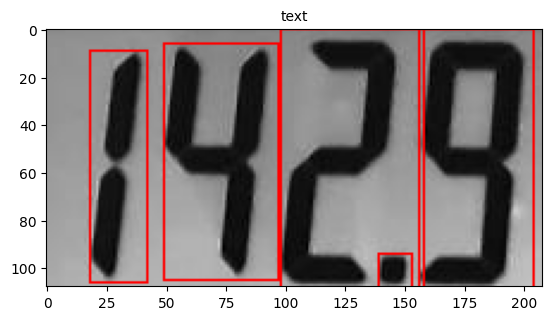

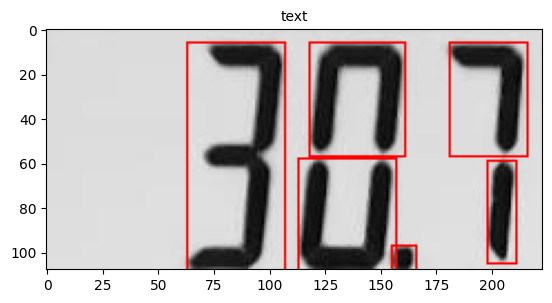

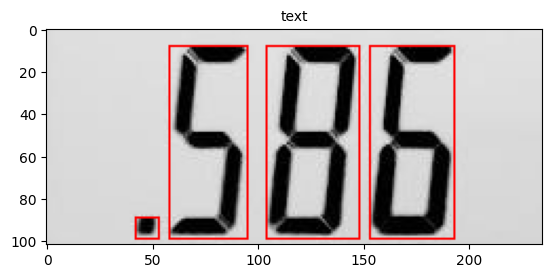

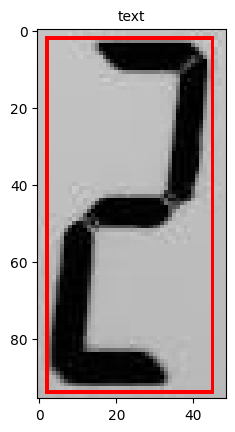

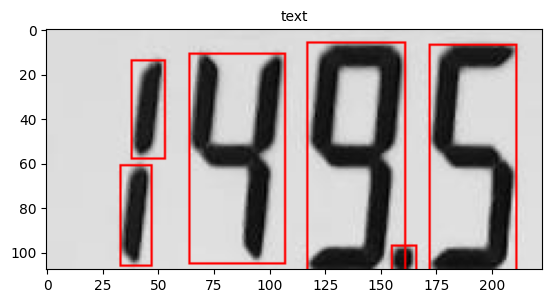

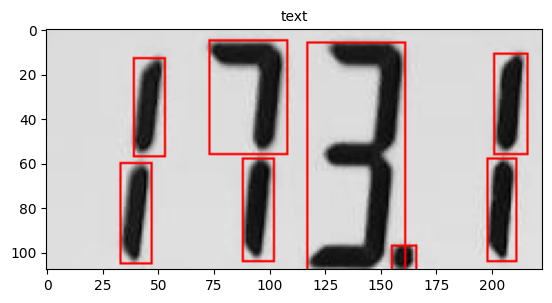

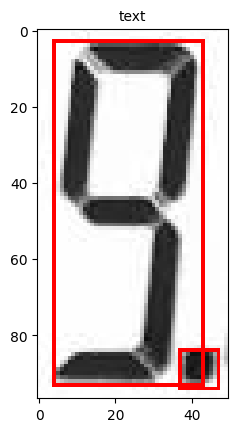

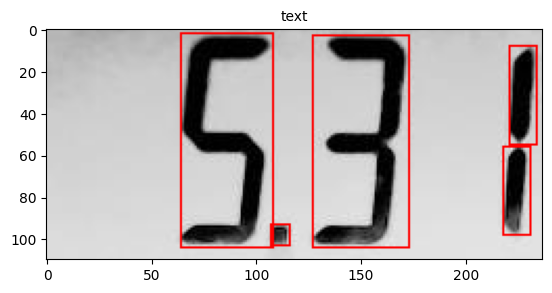

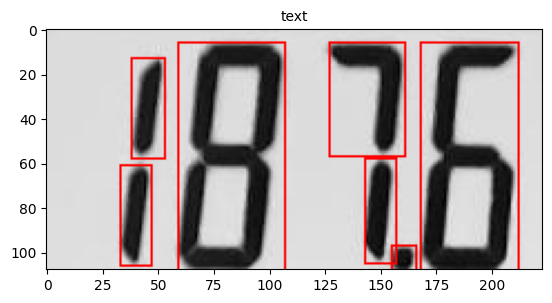

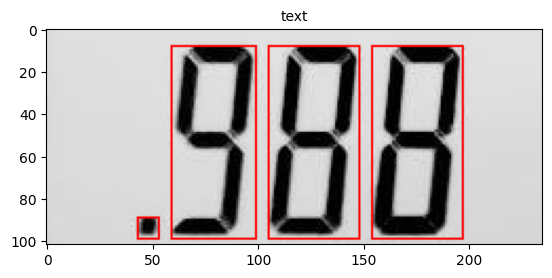

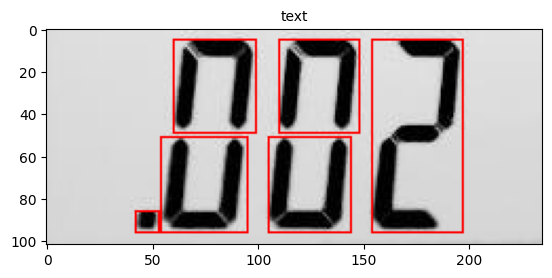

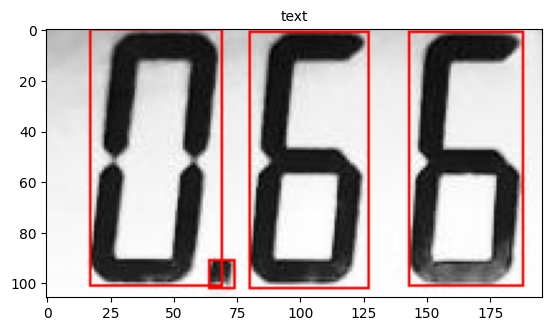

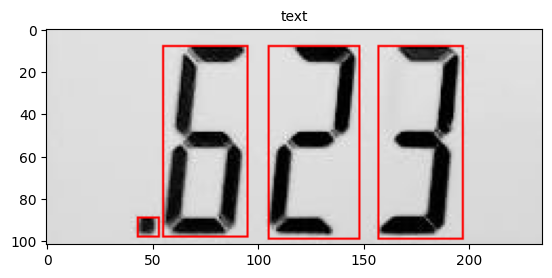

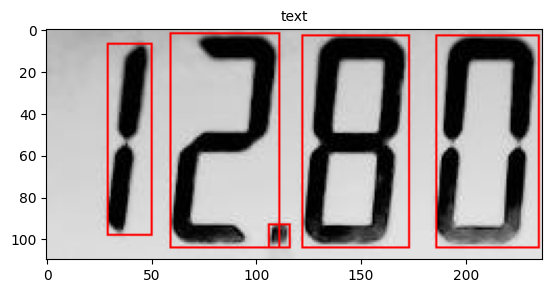

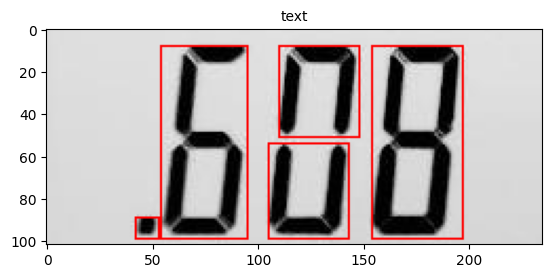

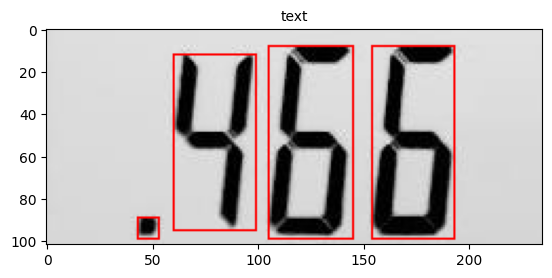

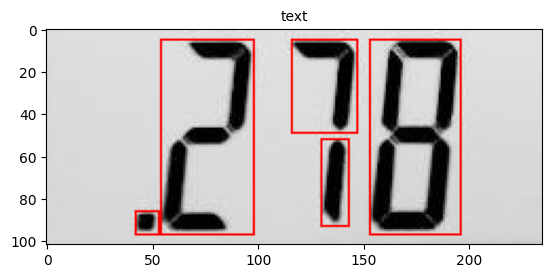

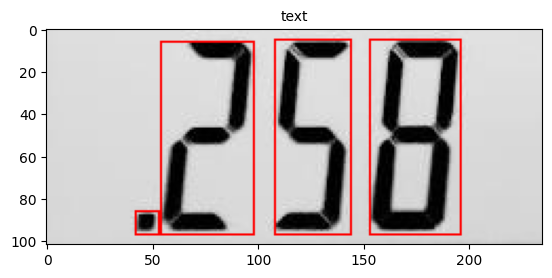

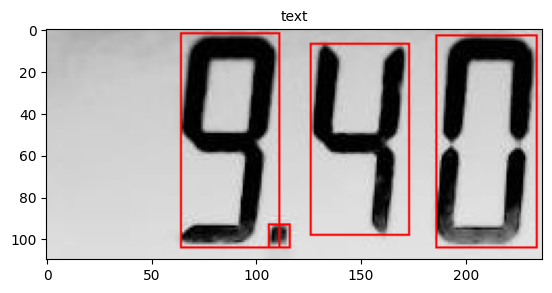

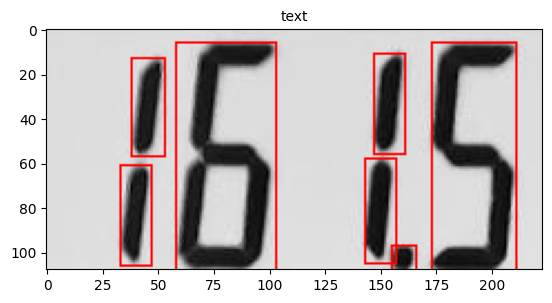

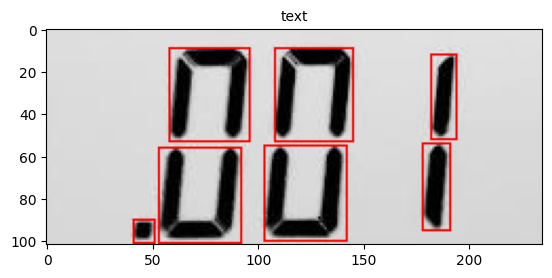

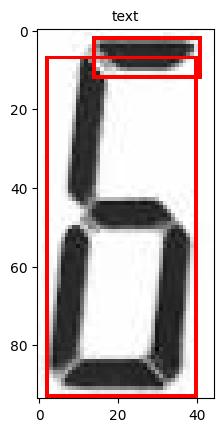

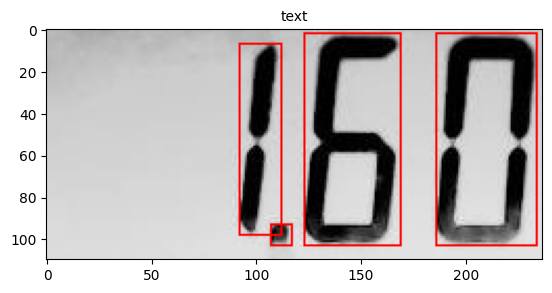

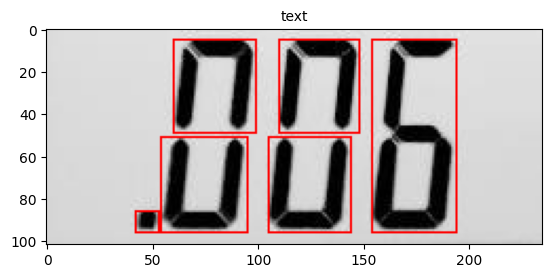

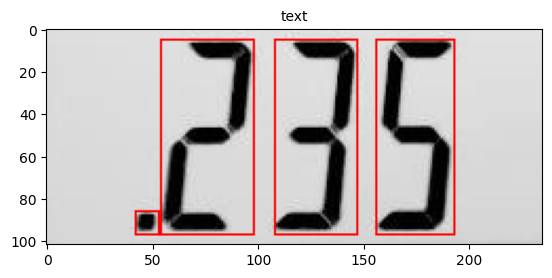

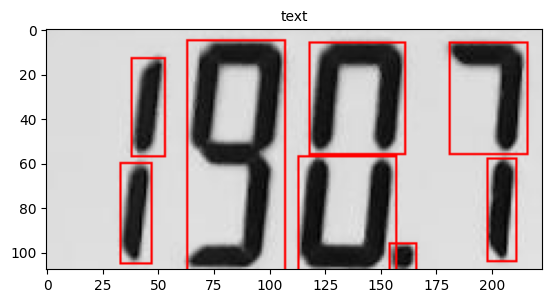

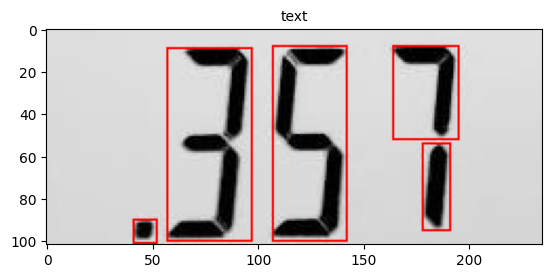

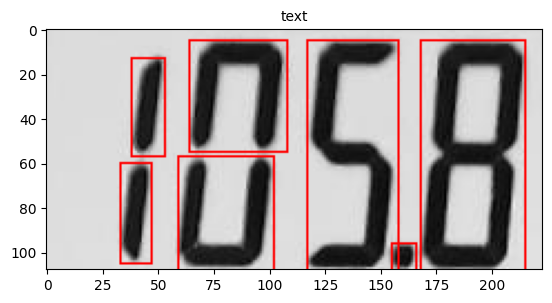

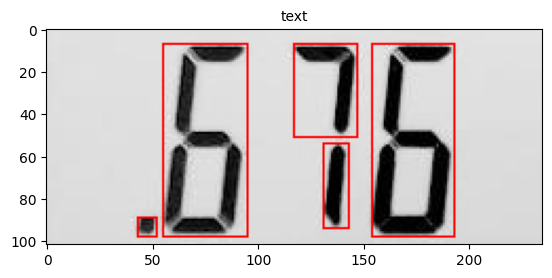

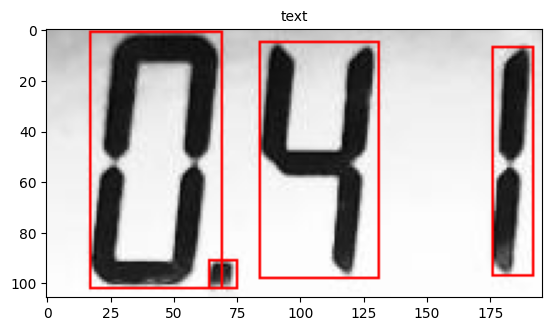

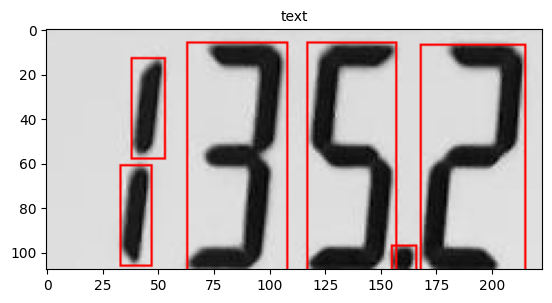

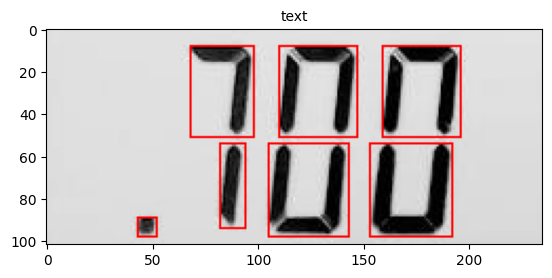

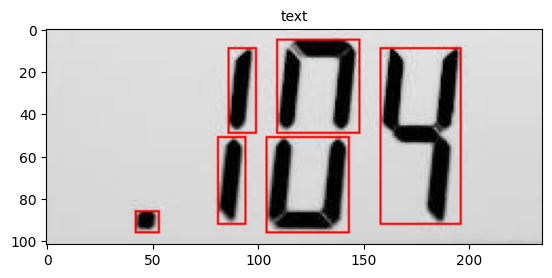

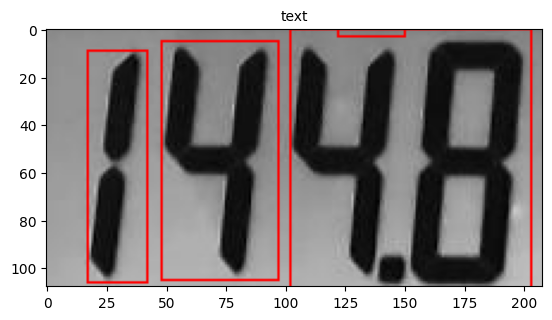

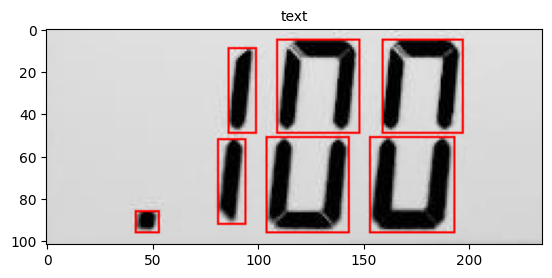

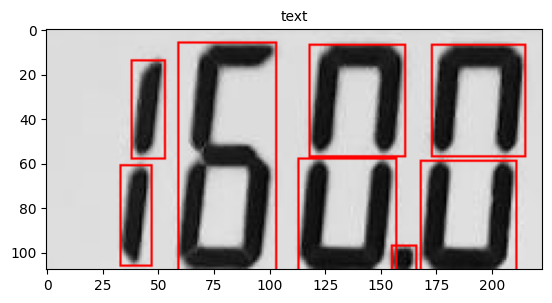

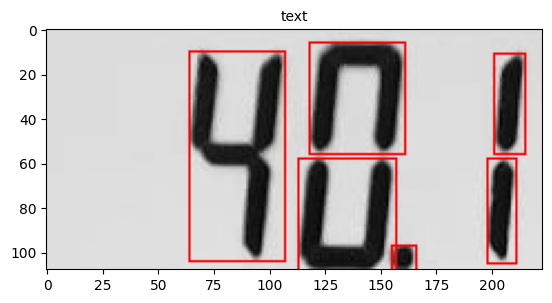

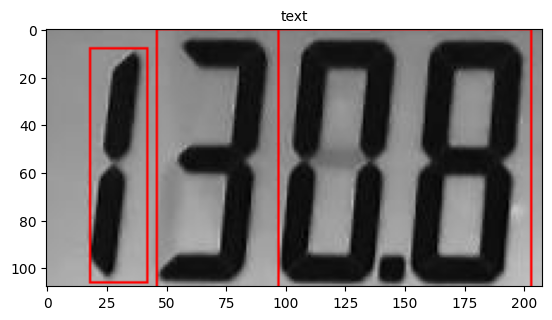

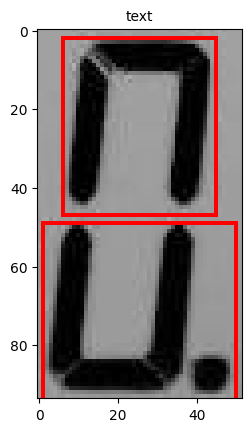

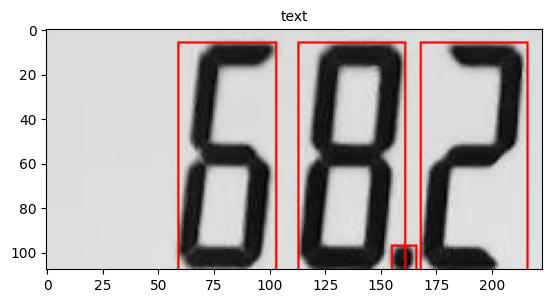

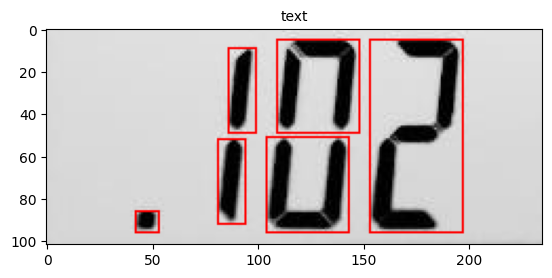

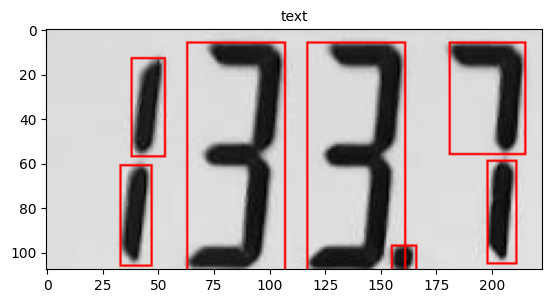

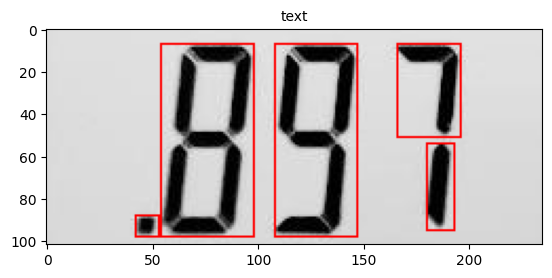

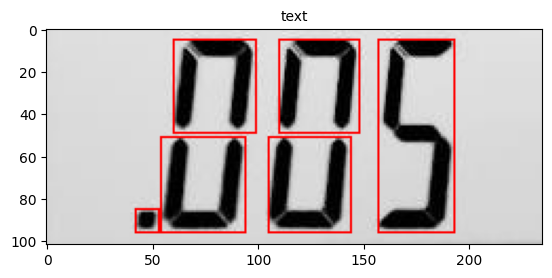

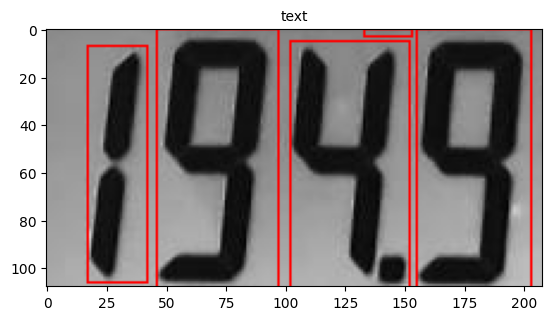

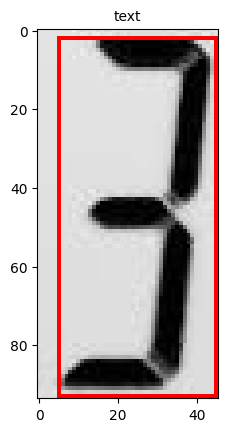

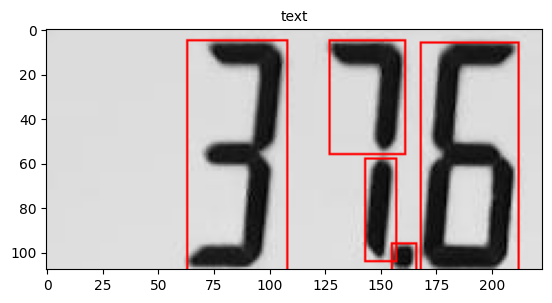

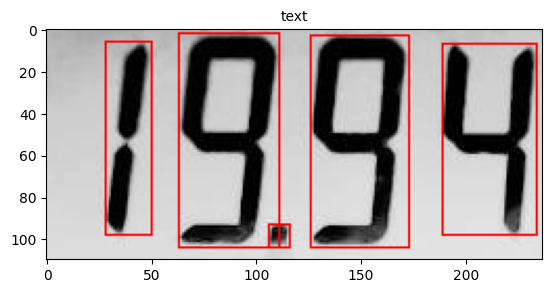

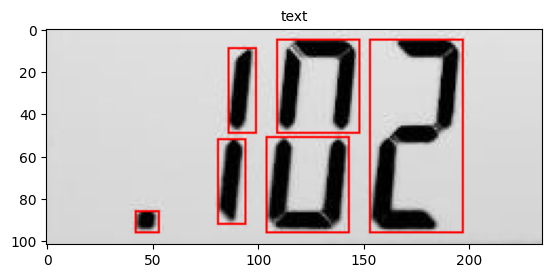

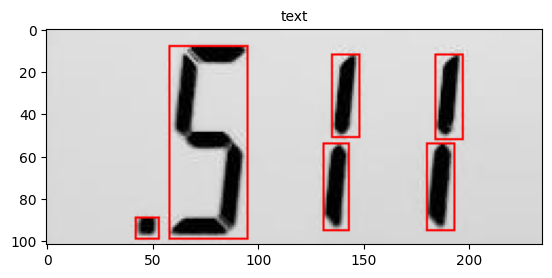

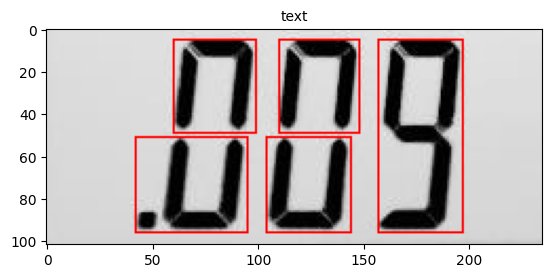

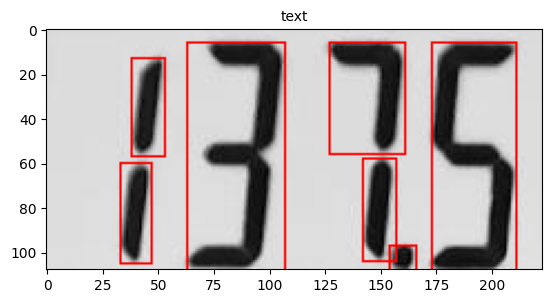

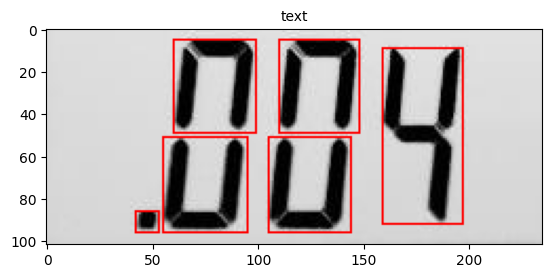

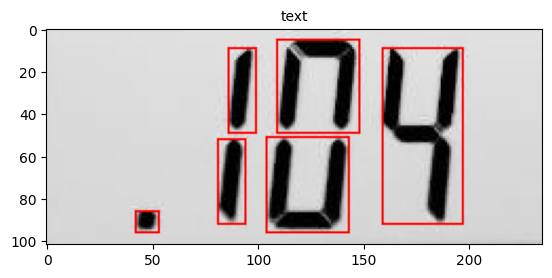

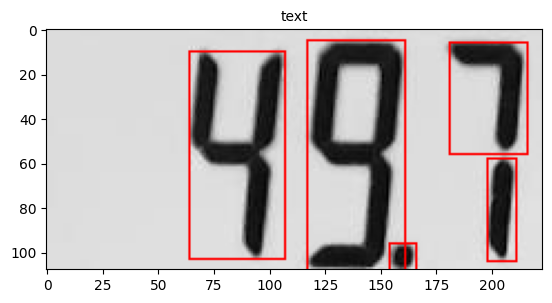

In [31]:
#Исследование данных
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Инвертированное изображение в градациях серого, обратный порог черного и белого
def accessPiexl(img):
    height = img.shape[0]
    width = img.shape[1]
    for i in range(height):
       for j in range(width):
           img[i][j] = 255- img[i][j] 
    return img

# Инвертированное двоичное изображениеq
def accessBinary(img, threshold=128):
    #cv2.imshow('testa', img)
    img = accessPiexl(img)
    #cv2.imshow('testb', img)
    # Отек кромок, без
    kernel = np.ones((3, 3), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    _, img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    #cv2.imshow('testb2', img)
    return img
    
def findBorderContours(path, maxArea=50):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = accessBinary(img)
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    borders = []
    for contour in contours:
        # Подгоняем край к границе
        x, y, w, h = cv2.boundingRect(contour)
        if w*h > maxArea:
            border = [(x, y), (x+w, y+h)]
            borders.append(border)
    return borders


# Отображение результатов и рамки
def showResults(path, borders, results=None):
    img = cv2.imread(path)
    # Рисовать
    #print(img.shape)
    for i, border in enumerate(borders):
        cv2.rectangle(img, border[0], border[1], (255, 0, 0))
        #if results:
            #cv2.putText(img, str(results[i]), border[0], cv2.FONT_HERSHEY_COMPLEX, 0.8, (255,0, 0), 1)
        #cv2.circle(img, border[0], 1, (0, 255, 0), 0)
    plt.figure()
    plt.imshow(img)
    plt.title('text', fontsize=10)

path = '/home/mikhail/it-academy/github/VisionDigital/data/val/'
for file in os.listdir('/home/mikhail/it-academy/github/VisionDigital/data/val/'):
    if file != 'labels.csv':
        borders = findBorderContours(path+file)
        showResults(path+file, borders)

"""

for file in os.listdir('/home/mikhail/it-academy/github/VisionDigital/data/val/'):
    if file != 'labels.csv':
        #print(file)
        maxArea=50
        img = cv2.imread('/home/mikhail/it-academy/github/VisionDigital/data/val/'+file)
        img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #cv2.imshow('a', img)
        kernel = np.ones((3,3),np.uint8)
        binary = cv2.erode(img_grayscale,kernel)       
        ret,binary = cv2.threshold(img_grayscale,100,255,cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        borders = []
        
        for contour in contours:
            # Подгоняем край к границе
            x, y, w, h = cv2.boundingRect(contour)
            if w*h > maxArea:
                border = [(x, y), (x+w, y+h)]
                borders.append(border)  
        results=None
        for i, border in enumerate(borders):
            cv2.rectangle(img, border[0], border[1], (0, 0, 255))
            if results:
                cv2.putText(img, str(results[i]), border[0], cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 0), 1)
        plt.figure()
        plt.imshow(img)
        plt.title('text', fontsize=10)
        #cv2.imshow('binary', binary)
        #cv2.imshow('img',img)
        cv2.waitKey(0)
"""
"""
режим_группировки — один из четырех режимов группировки найденных контуров:

    CV_RETR_LIST — выдаёт все контуры без группировки;
    CV_RETR_EXTERNAL — выдаёт только крайние внешние контуры. Например, если в кадре будет пончик, то функция вернет его внешнюю границу без дырки.
    CV_RETR_CCOMP — группирует контуры в двухуровневую иерархию. На верхнем уровне — внешние контуры объекта. На втором уровне — контуры отверстий, если таковые имеются. Все остальные контуры попадают на верхний уровень.
    CV_RETR_TREE — группирует контуры в многоуровневую иерархию.

метод_упаковки — один из трёх методов упаковки контуров:

    CV_CHAIN_APPROX_NONE — упаковка отсутствует и все контуры хранятся в виде отрезков, состоящих из двух пикселей.
    CV_CHAIN_APPROX_SIMPLE — склеивает все горизонтальные, вертикальные и диагональные контуры.
    CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS — применяет к контурам метод упаковки (аппроксимации) Teh-Chin.
"""
    

Тренировка модели

In [ ]:
    #accuracy = n_correct / float(length_of_data) * 100
    #norm_ED = norm_ED / float(length_of_data) # ICDAR2019 Normalized Edit Distance

In [4]:
#Предварительно надо сконфигурировать файл custom_example_colab.yaml
#                                                                          путь к файлу train.py библиотеки EasyOCR                          путь к файлу custom_example_colab.yaml вместе с его именем
! /bin/python3 /home/mikhail/it-academy/github/VisionDigital/trainer/train.py  -trainer_path '/home/mikhail/it-academy/github/EasyOCR/trainer/'  -yaml_path '/home/mikhail/it-academy/github/VisionDigital/config_files/custom_example_colab.yaml'

Filtering the images containing characters which are not in opt.character
Filtering the images whose label is longer than opt.batch_max_length
--------------------------------------------------------------------------------
dataset_root: /home/mikhail/it-academy/github/Diplom_project/data/train
opt.select_data: ['']
opt.batch_ratio: ['1']
--------------------------------------------------------------------------------
dataset_root:    /home/mikhail/it-academy/github/Diplom_project/data/train	 dataset: 
sub-directory:	/.	 num samples: 2673
num total samples of : 2673 x 1.0 (total_data_usage_ratio) = 2673
num samples of  per batch: 8 x 1.0 (batch_ratio) = 8
--------------------------------------------------------------------------------
Total_batch_size: 8 = 8
--------------------------------------------------------------------------------
dataset_root:    /home/mikhail/it-academy/github/Diplom_project/data/val	 dataset: /
sub-directory:	/.	 num samples: 133
-----------------------------

Проверка на валидационных данных

In [12]:
import sys
sys.path.insert(0,'/home/mikhail/it-academy/github/EasyOCR/easyocr/')
import easyocr
from easyocr import Reader

reader = easyocr.Reader(['en'],
                        model_storage_directory='/home/mikhail/it-academy/github/VisionDigital/saved_models', #здесь расположена модель digital.pth
                        user_network_directory='/home/mikhail/it-academy/github/VisionDigital/model',  #здесь расположены digital.py и digital.yaml
                        recog_network='digital',
                        gpu=False)    

count_file = 0
count_truth_file = 0
truth_flag = False
for file in os.listdir('/home/mikhail/it-academy/github/VisionDigital/data/val'):
    if file !='labels.csv':
        count_file += 1
        result = reader.readtext("/home/mikhail/it-academy/github/VisionDigital/data/val/"+file)
        result = result[0][1] if len(result) !=0 else None 
        if result == file.split('_')[0]:
            count_truth_file += 1
            truth_flag = True
        else:
            truth_flag = False
        print('ground_truth = ', file.split('_')[0],' result = ', result, ' ', truth_flag)
print('Valid acc: ', count_truth_file*100/count_file)

Using CPU. Note: This module is much faster with a GPU.


ground_truth =  61.7  result =  61.7   True
ground_truth =  .563  result =  563   False
ground_truth =  .442  result =  442   False
ground_truth =  .100  result =  100   False
ground_truth =  .100  result =  100   False
ground_truth =  38.0  result =  38.0   True
ground_truth =  .004  result =  004   False
ground_truth =  .387  result =  387   False
ground_truth =  7.  result =  None   False
ground_truth =  .849  result =  849   False
ground_truth =  74.8  result =  74.8   True
ground_truth =  23.8  result =  23.8   True
ground_truth =  .104  result =  104   False
ground_truth =  4  result =  4   True
ground_truth =  .106  result =  106   False
ground_truth =  .026  result =  026   False
ground_truth =  0.19  result =  0.19   True
ground_truth =  9  result =  None   False
ground_truth =  21.3  result =  21.3   True
ground_truth =  .101  result =  101   False
ground_truth =  25.2  result =  None   False
ground_truth =  0.55  result =  0.55   True
ground_truth =  .168  result =  168   Fa

Инференс

In [6]:
#                                                                       указываем путь к easyocr.py    easyocr.Reader                         указываем путь к модели digital                                           путь к digital.py и digital.yaml                                имя модели, файла объявления модели и файла yaml                                                            
! /bin/python3 '/home/mikhail/it-academy/github/Diplom_project/visiondigital.py'  -easyocr_path '/home/mikhail/it-academy/github/EasyOCR/easyocr/' -model_path '/home/mikhail/it-academy/github/Diplom_project/saved_models/' -user_network_path '/home/mikhail/it-academy/github/Diplom_project/model' -recog_network 'digital'

Using CPU. Note: This module is much faster with a GPU.
